Schelling's Model of Racial Segregation

Schelling's Model was one of the seminal works of agent based modelling in the social sciences, and we will attempt to recreate this model below.
In the model, the agents are differentiated based on race, of which there are two kinds. The agents will attempt to optimize their satisfaction ratio,
which is given by the ratio of neighbours with the same race divided by the total number of neighbours.
Hence, the agents will congregate towards neighbourhoods with people of the same race.

First, let's import some dependencies.

In [9]:
%matplotlib notebook

from model import VariableSchelModel
import matplotlib.pyplot as plt

We imported our model, along with matplotlib to graph our data.
Next, we construct the model based on our parameters. We will create a map of 20 by 20, so 400 square units. We will place 300 agents in the map
, with a population density of 0.75 person per square units. We will randomly allocate a race to the agents. And finally, we will assign a satisfaction ratio of 0.5 to the agents.
So, agents will only be satisfied if more than half of their neighbours are of the same race. Or put in another form, they will only tolerate their immediate neighbourhood having up to
half of the opposite race.
We will also create a matplotlib scatter plot.

We proceed to run the model for 100 steps.

And we graph two scatter plots, one corresponding to the initial state of the model, and one corresponding to the final state of the model. The agents are differentiated based on their group with different colors (red and blue).

<IPython.core.display.Javascript object>


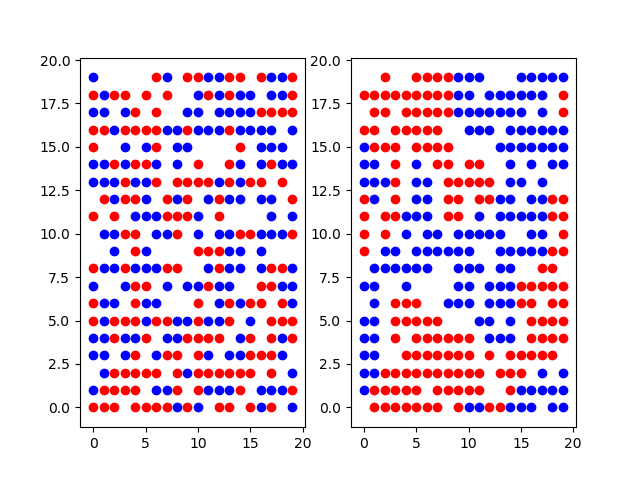

In [10]:
model = VariableSchelModel(density=0.75,width=20,height=20,satisfaction_ratio=[0.5,0.5],group_count=2,group_pct=[0.5])
fig,(ax1,ax2) = plt.subplots(1,2)

for i in range(100):
    model.step()

dc = model.data_collector.get_agent_vars_dataframe()

for agents in dc.xs(0,level="Step").values.tolist():
    if(agents[1] == 1):
        ax1.scatter(agents[0][0],agents[0][1],color="r")
    else:
        ax1.scatter(agents[0][0],agents[0][1],color="b")
        
for agents in dc.xs(99,level="Step").values.tolist():
    if(agents[1] == 1):
        ax2.scatter(agents[0][0],agents[0][1],color="r")
    else:
        ax2.scatter(agents[0][0],agents[0][1],color="b")
        
plt.show()


As we can see in the above graph, even with a satisfaction ratio of 0.5, i.e., agents willing to tolerate up to half of their neighbors being of different race, we observe a well defined segregation of races in different regions. The key point here being that seemingly small, individual tendencies, can produce large scale, aggregate phenomena. 

In this example, we use only two groups. The model can be specified to use a custom number of groups, each with their own population size and satisfaction ratio.
Alternatively, run the server in run.py to see a real-time simulation of the model.